# Trabalho de Inferência e Aprendizagem
#### Aluno: Matheus de Moncada Assis | Matrícula: 171703014 | Data de entrega: 23/06/2019

## 1. Introdução

### Questionamentos Iniciais

**1. Escolha da Base de Dados:**
> Como a indústria do cinema é determinada por números e análises, achei que seria interessante conseguir alcançar algumas previsões acerca dos filmes baseado em suas características principais, além de encontrar as variáveis que realmente são importantes para isso.

**2. Link para a Base:**
> https://www.themoviedb.org/?language=pt-BR <br> https://www.kaggle.com/tmdb/tmdb-movie-metadata


**3. PERGUNTA DE PESQUISA:**
> Seria possível prever a nota de um filme com base apenas em suas características intrínsecas, tais como gênero, capital investido, popularidade, empresas de produção e outros?

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

### Criação do DataFrame com as bases utilizadas

In [2]:
link_movies  = "tmdb_5000_movies.csv"
link_crew    = "tmdb_5000_credits.csv"

df_movies = pd.read_csv(link_movies, encoding="utf-8")
df_crew   = pd.read_csv(link_crew, encoding="utf-8")

df_crew.rename(columns={'movie_id': 'id'}, inplace=True)

df = df_movies.merge(df_crew, on="id")

In [3]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [5]:
print("Número de filmes:  {}\nNúmero de variáveis: {}".format(len(df),len(df.columns)))

Número de filmes:  4803
Número de variáveis: 23


 ### Conclusões acerca da Base

Primeiramente, podemos perceber que a base possui 23 variáveis. Dentre elas, algumas são númericas e outras são em formato de string, mas para essa análise, estaremos focando apenas nas númericas. Dessa maneira, podemos separá-las em:
 > **DEPENDENTES:** <br> vote_average <br><br>
   **INDEPENDENTES:** <br> budget, runtime, vote_count, popularity, revenue

A base que estamos utilizando contém 4803 linhas, em que cada linha representa um filme e todos os seus atributos.

Ademais, nosso problema a ser tratado é encontrar um modelo capaz de prever a nota de um filme com base nas suas variáveis independentes para alcançar um resultado verdadeiro para a variável dependente.

### Analisando a Base mais de perto e fazendo ajustes

In [6]:
main_df = df[['id', 'original_title', 'runtime', 'popularity', 'budget', 'revenue', 'vote_count', 'vote_average']]

In [7]:
main_df.head(6)

,id,original_title,runtime,popularity,budget,revenue,vote_count,vote_average
0,19995,Avatar,162.0,150.437577,237000000,2787965087,11800,7.2
1,285,Pirates of the Caribbean: At World's End,169.0,139.082615,300000000,961000000,4500,6.9
2,206647,Spectre,148.0,107.376788,245000000,880674609,4466,6.3
3,49026,The Dark Knight Rises,165.0,112.312950,250000000,1084939099,9106,7.6
4,49529,John Carter,132.0,43.926995,260000000,284139100,2124,6.1
5,559,Spider-Man 3,139.0,115.699814,258000000,890871626,3576,5.9


In [8]:
main_df.sort_values(by=['vote_average'])[-1::-1].head(10)

,id,original_title,runtime,popularity,budget,revenue,vote_count,vote_average
4662,40963,Little Big Top,0.0,0.092100,0,0,1,10.0
4247,361505,Me You and Five Bucks,90.0,0.094105,1,0,2,10.0
4045,78373,"Dancer, Texas Pop. 81",97.0,0.376662,0,565592,1,10.0
3519,89861,Stiff Upper Lips,99.0,0.356495,0,0,1,10.0
3992,346081,Sardaarji,0.0,0.296981,0,0,2,9.5
2386,69848,One Man's Hero,121.0,0.910529,0,0,2,9.3
1881,278,The Shawshank Redemption,142.0,136.747729,25000000,28341469,8205,8.5
2970,88641,There Goes My Baby,99.0,0.037073,10500000,123509,2,8.5
3337,238,The Godfather,175.0,143.659698,6000000,245066411,5893,8.4
2796,43867,The Prisoner of Zenda,101.0,4.021389,0,0,11,8.4


In [9]:
main_df['vote_count'].value_counts()[:10]

0     62
1     53
2     46
4     43
3     41
6     38
8     37
10    34
11    32
9     32
Name: vote_count, dtype: int64

In [10]:
main_df['budget'].value_counts()[:10]

0           1037
20000000     144
30000000     128
25000000     126
40000000     123
15000000     120
35000000     102
10000000     101
50000000     101
60000000      86
Name: budget, dtype: int64

In [11]:
t           = 0
exclude_row = []
count       = 0
for i in main_df.iterrows():
    if i[1]['vote_count'] < 10 or i[1]['budget'] == 0 or i[1]['revenue'] == 0:
        exclude_row.append(t)
        count += 1
    t += 1
print(count/len(main_df))

main_df = main_df.drop(exclude_row)

0.33666458463460336


### Conclusões dos Ajustes

Analisando a base mais a fundo, podemos perceber alguns valores que não fazem sentido para nossa análise, como número de votos menor que 15 (valor escolhido arbitrariamente) e custo de realização do filme em 0. Optei por eliminar tais filmes que apresentassem essas condições. Com isso, nossa base passa a ter 67% do tamanho inicial dela.

### Análise Descritiva da Base

In [12]:
main_df.head()

,id,original_title,runtime,popularity,budget,revenue,vote_count,vote_average
0,19995,Avatar,162.0,150.437577,237000000,2787965087,11800,7.2
1,285,Pirates of the Caribbean: At World's End,169.0,139.082615,300000000,961000000,4500,6.9
2,206647,Spectre,148.0,107.376788,245000000,880674609,4466,6.3
3,49026,The Dark Knight Rises,165.0,112.312950,250000000,1084939099,9106,7.6
4,49529,John Carter,132.0,43.926995,260000000,284139100,2124,6.1


#### Description

In [13]:
main_df[['runtime', 'popularity', 'budget', 'revenue', 'vote_count', 'vote_average']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
runtime,3186.0,1.108311e+02,2.094650e+01,41.000000,9.600000e+01,1.070000e+02,1.210000e+02,3.380000e+02
popularity,3186.0,2.941696e+01,3.625710e+01,0.034259,1.079826e+01,2.074652e+01,3.767750e+01,8.755813e+02
budget,3186.0,4.111187e+07,4.450889e+07,1.000000,1.100000e+07,2.600000e+07,5.500000e+07,3.800000e+08
revenue,3186.0,1.228261e+08,1.870525e+08,5.000000,1.775538e+07,5.679228e+07,1.483932e+08,2.787965e+09
vote_count,3186.0,9.904137e+02,1.419272e+03,10.000000,1.882500e+02,4.830000e+02,1.156500e+03,1.375200e+04
vote_average,3186.0,6.320213e+00,8.491751e-01,2.300000,5.800000e+00,6.300000e+00,6.900000e+00,8.500000e+00


#### Budget e Revenue
Acerca do valor da variável de preço da base, podemos observar que a média de Lucro dos filmes é positiva e praticamente o dobro do valor do orçamento.

In [14]:
print("Orçamento médio de um filme: ${:.2f}".format(main_df['budget'].mean()))
print("Receita média de um filme: ${:.2f}".format(main_df['revenue'].mean()))
print("Lucro médio de um filme: ${:.2f}".format(main_df['revenue'].mean() - main_df['budget'].mean()))

Orçamento médio de um filme: $41111873.56
Receita média de um filme: $122826134.19
Lucro médio de um filme: $81714260.63


#### Vote Average
Para as notas, podemos observar que a média está em 6.3, bem próxima de 6, que tende a ser um valor considerado intermediário para a maioria das votações. Além disso, com o desvio padrão em 0.85, podemos observar que muitos filmes tem notas superiores a 7 e menores que 6. A maior nota encontrada na base é 8.5 e a menor 2.3.

In [15]:
print("Maior nota para um filme: {}".format(max(main_df['vote_average'])))
print("Menor nota para um filme: {}".format(min(main_df['vote_average'])))
print("Média de nota para filme: {:.2f}".format(main_df['vote_average'].mean()))
print("Desvio Padrão das notas : {:.2f}".format(np.var(main_df['vote_average']) ** (1/2)))

Maior nota para um filme: 8.5
Menor nota para um filme: 2.3
Média de nota para filme: 6.32
Desvio Padrão das notas : 0.85


#### Popularity
Montando um gráfico de popularidade, podemos perceber que alguns filmes se destacam dos demais nessa categoria, como é o caso de **Minions** e **Interestelar**. Além disso, com nosso segundo gráfico, podemos perceber que a nota não depende necessariamente da popularidade, mas que ela garante, na maioria dos casos, um valor próximo ou acima de 6.

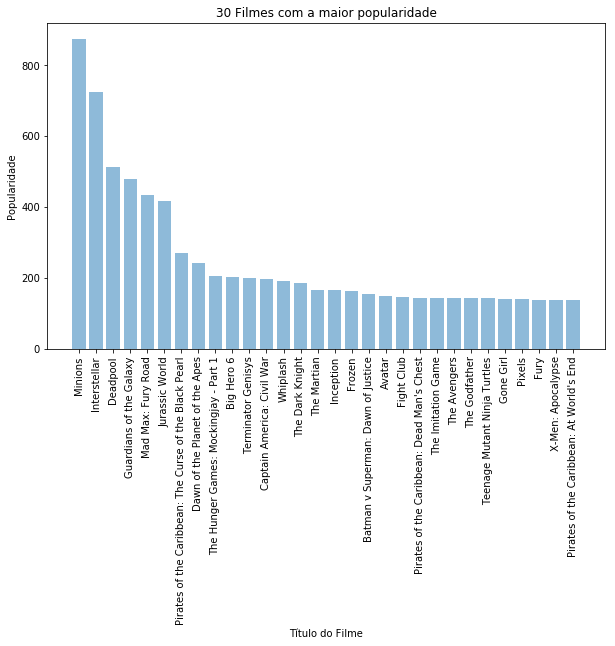

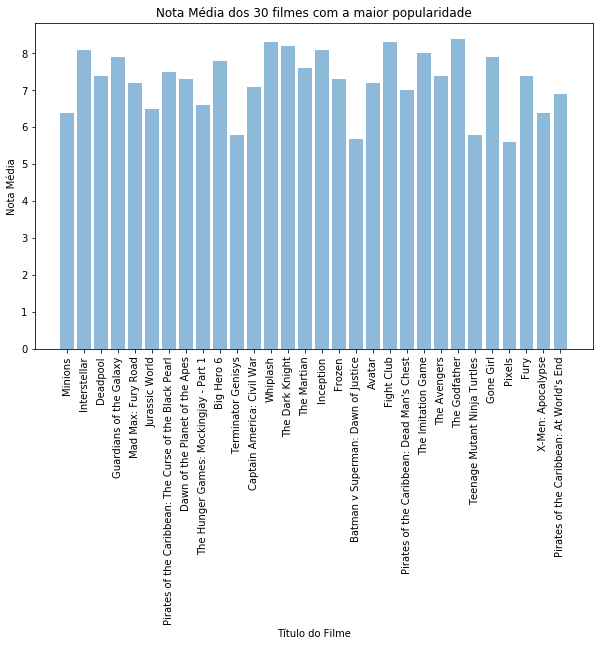

In [16]:
plt.figure(figsize=(10,6))
titles     = main_df.sort_values(by=["popularity"], ascending=False)["original_title"][:30]
popularity = main_df.sort_values(by=["popularity"], ascending=False)["popularity"][:30]
y_pos      = np.arange(30)
plt.bar(y_pos, popularity, align='center', alpha=0.5)
plt.xticks(y_pos, titles, rotation=90)
plt.title('30 Filmes com a maior popularidade')
plt.xlabel("Título do Filme")
plt.ylabel("Popularidade")

plt.figure(figsize=(10,6))
titles     = main_df.sort_values(by=["popularity"], ascending=False)["original_title"][:30]
popularity = main_df.sort_values(by=["popularity"], ascending=False)["vote_average"][:30]
y_pos      = np.arange(30)
plt.bar(y_pos, popularity, align='center', alpha=0.5)
plt.xticks(y_pos, titles, rotation=90)
plt.title('Nota Média dos 30 filmes com a maior popularidade')
plt.xlabel("Título do Filme")
plt.ylabel("Nota Média")
plt.show()

plt.show()

#### Budget
Como podemos ver a seguir, seguindo o mesmo modelo anterior, para o caso de budget, quanto maior o orçamento, menor tende a ser nota comparada a outras categorias. Ou seja, para os 30 maiores orçamentos, a maior nota não ultrapassou 8, e algumas se aproximaram de 5.

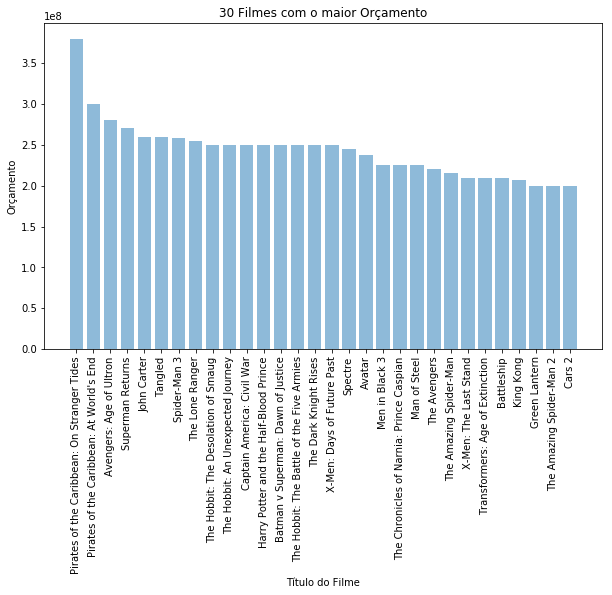

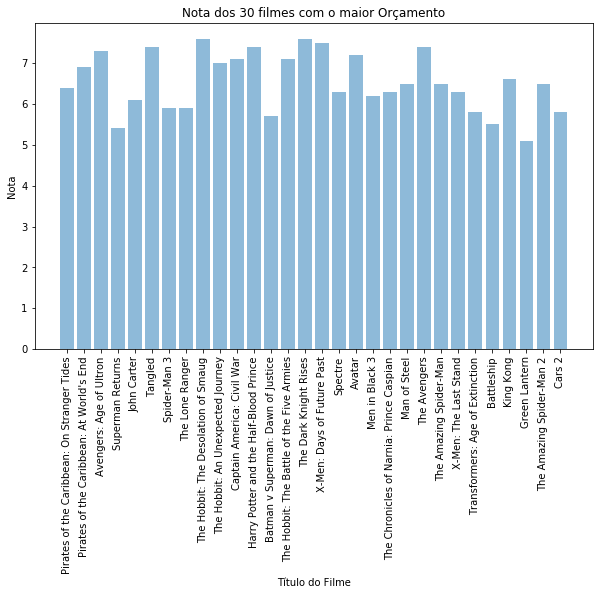

In [17]:
plt.figure(figsize=(10,6))
titles     = main_df.sort_values(by=["budget"], ascending=False)["original_title"][:30]
popularity = main_df.sort_values(by=["budget"], ascending=False)["budget"][:30]
y_pos      = np.arange(30)
plt.bar(y_pos, popularity, align='center', alpha=0.5)
plt.xticks(y_pos, titles, rotation=90)
plt.title('30 Filmes com o maior Orçamento')
plt.xlabel("Título do Filme")
plt.ylabel("Orçamento")

plt.figure(figsize=(10,6))
titles     = main_df.sort_values(by=["budget"], ascending=False)["original_title"][:30]
popularity = main_df.sort_values(by=["budget"], ascending=False)["vote_average"][:30]
y_pos      = np.arange(30)
plt.bar(y_pos, popularity, align='center', alpha=0.5)
plt.xticks(y_pos, titles, rotation=90)
plt.title('Nota dos 30 filmes com o maior Orçamento')
plt.xlabel("Título do Filme")
plt.ylabel("Nota")
plt.show()

#### Vote Average
Ainda sobre a nota, um fator curioso após essa análise é que aproximadamente 63.6% da base tem uma nota maior do que 6, mas somente 1.2% de toda a base possui uma nota maior do que 8. Dessa maneira, podemos perceber o motivo da média ser 6.3, com desvio padrão 0.85.

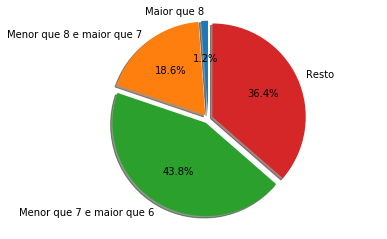

In [18]:
list_of_vote = [[], [], [], []]
for i in main_df.iterrows():
    if i[1]['vote_average'] > 8:
        list_of_vote[0].append(i)
    elif i[1]['vote_average'] > 7:
        list_of_vote[1].append(i)
    elif i[1]['vote_average'] > 6:
        list_of_vote[2].append(i)
    else:
        list_of_vote[3].append(i)
        
total = len(list_of_vote[0]) + len(list_of_vote[1]) + len(list_of_vote[2]) + len(list_of_vote[3])

labels = 'Maior que 8', 'Menor que 8 e maior que 7', 'Menor que 7 e maior que 6', 'Resto'
sizes = [len(list_of_vote[0])*100/total, 
         len(list_of_vote[1])*100/total, 
         len(list_of_vote[2])*100/total, 
         len(list_of_vote[3])*100/total]
explode = (0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Separando a Base em Treino e Teste
Para tal separação, aproximadamente 30% da base fará parte do teste e 70% do treino. Para isso, utilizo um modelo simples que separa os filmes para cada base de acordo com a probabilidade.

In [19]:
row_numbers = list(main_df.index)
size        = len(row_numbers)
test_list   = []
train_list  = []

for i in range(len(row_numbers)):
    list_of_choice = [0]*3 + [1]*7
    dice = rd.choice(list_of_choice)
    if dice == 0:
        test_list.append(row_numbers[i])
    else:
        train_list.append(row_numbers[i])
    
train_df = main_df.drop(test_list)
test_df  = main_df.drop(train_list)

#### Base de Treino

In [20]:
print("Tamanho da Base de Treino: {}".format(len(train_df)))
train_df.head()

Tamanho da Base de Treino: 2190


,id,original_title,runtime,popularity,budget,revenue,vote_count,vote_average
3,49026,The Dark Knight Rises,165.0,112.312950,250000000,1084939099,9106,7.6
4,49529,John Carter,132.0,43.926995,260000000,284139100,2124,6.1
5,559,Spider-Man 3,139.0,115.699814,258000000,890871626,3576,5.9
7,99861,Avengers: Age of Ultron,141.0,134.279229,280000000,1405403694,6767,7.3
13,57201,The Lone Ranger,149.0,49.046956,255000000,89289910,2311,5.9


#### Base de Teste

In [21]:
print("Tamanho da Base de Teste: {}".format(len(test_df)))
test_df.head()

Tamanho da Base de Teste: 996


,id,original_title,runtime,popularity,budget,revenue,vote_count,vote_average
0,19995,Avatar,162.0,150.437577,237000000,2787965087,11800,7.2
1,285,Pirates of the Caribbean: At World's End,169.0,139.082615,300000000,961000000,4500,6.9
2,206647,Spectre,148.0,107.376788,245000000,880674609,4466,6.3
6,38757,Tangled,100.0,48.681969,260000000,591794936,3330,7.4
8,767,Harry Potter and the Half-Blood Prince,153.0,98.885637,250000000,933959197,5293,7.4


## 2. Modelagem

### Introdução das variáveis
Para a modelagem, como já tratei da base anteriormente, estarei utilizando as variáveis numéricas já separadas:
> **DEPENDENTE:** <br> vote_average <br><br>
  **INDEPENDENTE:** <br> runtime, popularity, budget, revenue, vote_count
 
As variáveis id e original_title não serão utilizadas na modelagem, mas elas se tornam úteis para uma análise de caso.

### Iniciando a modelagem - K Nearest Neighbors (KNN)
Para o primeiro passo, estaremos utilizado o modelo K-NearestNeighbors de Regressão para determinar a nota dos filmes. Para isso, levamos em conta nossas variáveis independentes e tentamos nos aproximar do valor real da variável dependente.

Escolhendo um número n arbitrário, temos o primeiro resultado do modelo:

In [22]:
train_parameters = np.array(train_df[['runtime', 'popularity', 'budget', 'revenue', 'vote_count']])
train_results    = np.array(train_df[['vote_average']])
test_parameters  = np.array(test_df[['runtime', 'popularity', 'budget', 'revenue', 'vote_count']])
test_results     = np.array(test_df[['vote_average']])

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(train_parameters, train_results)
pred = knn.predict(test_parameters)

print(test_results[:5])
print(pred[:5])

[[7.2]
 [6.9]
 [6.3]
 [7.4]
 [7.4]]
[[7.1       ]
 [6.63333333]
 [7.        ]
 [6.46666667]
 [6.73333333]]


#### Hiperparâmetro
Após a primeira modelagem, podemos perceber a presença do hiperparâmetro K. Dessa forma, devemos escolher o K ótimo para que o modelo seja o mais preciso possível.

#### k-Fold Cross-Validation
Utilizando a k-Fold Cross-Validation, podemos encontrar o melhor valor de K (KNN) para o nosso modelo. Escolhendo entre 30 possíveis Ks para o modelo, estaremos utilizando um valor de k (k-Fold Cross-Validation) igual a 20.

K: 25


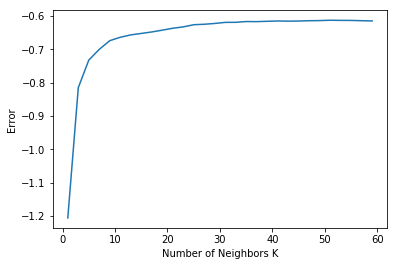

In [23]:
t1 = main_df[['runtime', 'popularity', 'budget', 'revenue', 'vote_count']]
t2 = main_df[['vote_average']]

list_of_ks = [i for i in range(1,60) if i % 2 != 0]
cv_scores = []


for k in list_of_ks:
    kfold = KFold(n_splits=20)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_parameters, train_results)
    scores = cross_val_score(knn, train_parameters, train_results, cv=kfold, scoring="neg_mean_squared_error")
    cv_scores.append(scores.mean())

optimal_k = cv_scores.index(max(cv_scores))
print("K: {}".format(optimal_k))

plt.figure(figsize=(6,4))
plt.plot(list_of_ks, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error')
plt.show()

### KNN Final
Após realizarmos o k-Fold Cross-Validation, conseguimos encontrar o valor ótimo de K (29) e podemos seguir com nosso modelo

In [24]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(train_parameters, train_results)
pred = knn.predict(test_parameters)

print(knn.score(test_parameters, test_results))
print(test_results[:5])
print(pred[:5])

0.12110952387911533
[[7.2]
 [6.9]
 [6.3]
 [7.4]
 [7.4]]
[[7.1137931 ]
 [6.96896552]
 [6.97241379]
 [6.88275862]
 [6.98965517]]


In [25]:
knn_df = pd.DataFrame(test_df[['original_title', 'runtime', 'popularity', 'budget', 'revenue', 'vote_count', 'vote_average']])
knn_df['prediction'] = pred

In [26]:
knn_df.head(20)

,original_title,runtime,popularity,budget,revenue,vote_count,vote_average,prediction
0,Avatar,162.0,150.437577,237000000,2787965087,11800,7.2,7.113793
1,Pirates of the Caribbean: At World's End,169.0,139.082615,300000000,961000000,4500,6.9,6.968966
2,Spectre,148.0,107.376788,245000000,880674609,4466,6.3,6.972414
6,Tangled,100.0,48.681969,260000000,591794936,3330,7.4,6.882759
8,Harry Potter and the Half-Blood Prince,153.0,98.885637,250000000,933959197,5293,7.4,6.989655
9,Batman v Superman: Dawn of Justice,151.0,155.790452,250000000,873260194,7004,5.7,7.000000
10,Superman Returns,154.0,57.925623,270000000,391081192,1400,5.4,6.272414
11,Quantum of Solace,106.0,107.928811,200000000,586090727,2965,6.1,6.803448
12,Pirates of the Caribbean: Dead Man's Chest,151.0,145.847379,200000000,1065659812,5246,7.0,7.055172
14,Man of Steel,143.0,99.398009,225000000,662845518,6359,6.5,6.931034


In [70]:
sum_error = 0
total = len(knn_df)
for i in knn_df.iterrows():
    sum_error += (i[1]['vote_average'] - i[1]['prediction']) ** (2)
print("Erro Quadrado Médio de Teste: {:.3f}".format((sum_error/total)**(1/2)))

Erro Quadrado Médio de Teste: 0.802


In [89]:
print("Média das Notas de Predição: {:.3f}".format(knn_df['prediction'].mean()))
print("Desvio Padrão das Notas de Predição: {:.3f}".format(np.var(knn_df['prediction'])**(1/2)))

Média das Notas de Predição: 6.321
Desvio Padrão das Notas de Predição: 0.355


### Conclusões sobre a primeira modelagem

Utilizando tais parâmetros, foi encontrado um resultado satisfatório para a predição de Nota, entretanto, poderiam ser levados em conta outros parâmetros, tais como gênero, atores no filme, etc. Acredito que essa modelagem tende a ser mais próxima da realidade por envolver puramente números, ao invés de uma pré-segmentação de gênero, que poderia tornar o modelo menos geral. É importante ressaltar que, por ser baseado em números, ele não consegue prever alguns pontos fora da curva, mas ele alcança valores aproximados para isso. Além disso, podemos observar um Erro Quadrado Médio de 0.802.

### Iniciando a Modelagem - Multi Layer Perceptron Regression (MLP)
Após utilizar o KNN, vou estar realizando a modelagem a partir de um modelo de Neural Networks, o Multi Layer Perceptron para Regressão.

Ajustando os parâmetros (variáveis independentes), utilizaremos uma regularização Normal:

In [27]:
scaler = StandardScaler()
scaler.fit(train_parameters)

train_parameters_scaler = scaler.transform(train_parameters)
test_parameters_scaler  = scaler.transform(test_parameters)

#### Criando o modelo MLP
Primeiramente, escolho um valor arbitrário do tamanho da hidden_layer. Com isso, conseguimos gerar o resultado das predições das notas.

In [28]:
mlp = MLPRegressor(hidden_layer_sizes=(10),max_iter=2000)
mlp.fit(train_parameters_scaler, np.ravel(train_results))
predictions = mlp.predict(test_parameters_scaler)

array([ 9.380137  ,  6.39747915,  6.55914318,  6.17788811,  6.78468946,
        7.00429169,  6.02406972,  6.1669399 ,  6.97479408,  6.9127878 ,
        8.57814953,  6.61176939,  5.94273884,  7.9027972 ,  6.84245821,
        6.58728099,  6.0620709 ,  5.88380544,  5.96619696,  6.1419744 ,
        6.92137168,  6.40648388,  5.98073654,  7.36535658,  6.45123037,
        6.53360537,  7.07429445,  7.52821601,  5.9219746 ,  6.22231854,
        7.24041872,  6.44681136,  6.50479171,  7.53804659,  6.07380307,
        5.97732647,  5.97794484,  6.10877848,  6.02818695,  6.02996758,
        6.4604391 ,  6.31945749,  6.75799683,  6.01597755,  6.34825993,
        6.17280063,  6.07248477,  7.21496243,  6.55064485,  6.15325572,
        6.67635997,  6.02269609,  7.07788604,  6.95555243,  6.72749337,
        6.13336576,  6.01845268,  5.54965835,  6.22436796,  7.11005356,
        5.81436946,  6.23942062,  6.55767155,  6.23472954,  6.38742743,
        6.11977605,  6.00626508,  6.50674446,  6.0796629 ,  6.66

#### Hiperparâmetro
Após a primeira modelagem, podemos perceber a presença do hiperparâmetro hidden_layer_size. Dessa forma, devemos escolher o hidden_layer_size ótimo para que o modelo seja o mais preciso possível.

#### k-Fold Cross-Validation
Utilizando a k-Fold Cross-Validation, podemos encontrar o melhor valor do hidden_layer_size para o nosso modelo. Escolhendo entre 15 possíveis valores de size, estaremos utilizando um valor de k (k-Fold Cross-Validation) igual a 15.

Hidden Layer Size: 70


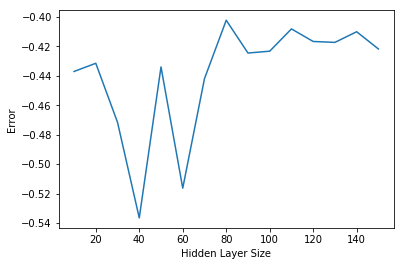

In [49]:
list_of_sizes = [i for i in range(1,151) if i % 10 == 0]
cv_scores = []

for k in list_of_ks:
    kfold = KFold(n_splits=15)
    mlp = MLPRegressor(hidden_layer_sizes=(k), max_iter=2000)
    mlp.fit(train_parameters_scaler, np.ravel(train_results))
    scores = cross_val_score(mlp, train_parameters_scaler, np.ravel(train_results), cv=kfold, scoring="neg_mean_squared_error")
    cv_scores.append(scores.mean())
    
optimal_size = cv_scores.index(max(cv_scores))*10
print("Hidden Layer Size: {}".format(optimal_size))

plt.figure(figsize=(6,4))
plt.plot(list_of_sizes, cv_scores)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Error')
plt.show()

### MLP Final
Após realizarmos o k-Fold Cross-Validation, conseguimos encontrar o valor ótimo para o size e podemos seguir com nosso modelo.

In [55]:
mlp = MLPRegressor(hidden_layer_sizes=(optimal_size),max_iter=2000)
mlp.fit(train_parameters_scaler, np.ravel(train_results))
predictions = mlp.predict(test_parameters_scaler)

print(knn.score(test_parameters_scaler, test_results))
print(np.ravel(test_results[:5]))
print(predictions[:5])

-0.017510811744848587
[7.2 6.9 6.3 7.4 7.4]
[9.35532234 6.62698379 6.65870162 6.83079898 6.79177109]


In [56]:
mlp_df = pd.DataFrame(test_df[['original_title', 'runtime', 'popularity', 'budget', 'revenue', 'vote_count', 'vote_average']])
mlp_df['prediction'] = predictions
mlp_df.head(20)

,original_title,runtime,popularity,budget,revenue,vote_count,vote_average,prediction
0,Avatar,162.0,150.437577,237000000,2787965087,11800,7.2,9.355322
1,Pirates of the Caribbean: At World's End,169.0,139.082615,300000000,961000000,4500,6.9,6.626984
2,Spectre,148.0,107.376788,245000000,880674609,4466,6.3,6.658702
6,Tangled,100.0,48.681969,260000000,591794936,3330,7.4,6.830799
8,Harry Potter and the Half-Blood Prince,153.0,98.885637,250000000,933959197,5293,7.4,6.791771
9,Batman v Superman: Dawn of Justice,151.0,155.790452,250000000,873260194,7004,5.7,6.810689
10,Superman Returns,154.0,57.925623,270000000,391081192,1400,5.4,6.242420
11,Quantum of Solace,106.0,107.928811,200000000,586090727,2965,6.1,6.398525
12,Pirates of the Caribbean: Dead Man's Chest,151.0,145.847379,200000000,1065659812,5246,7.0,6.743250
14,Man of Steel,143.0,99.398009,225000000,662845518,6359,6.5,6.759730


In [84]:
sum_error = 0
total     = len(mlp_df)
for i in mlp_df.iterrows():
    sum_error += (i[1]['vote_average'] - i[1]['prediction']) ** 2
    
    
print("Erro Quadrado Médio da Predição: {:.3f}".format((sum_error/total)**(1/2)))

Erro Quadrado Médio da Predição: 0.674


In [90]:
print("Média da Nota de Predição: {:.3f}".format(mlp_df['prediction'].mean()))
print("Desvio Padrão das Notas de Predição: {:.3f}".format(np.var(mlp_df['prediction'])**(1/2)))

Média da Nota de Predição: 6.300
Desvio Padrão das Notas de Predição: 0.610


### Conclusões sobre a Segunda Modelagem
Da mesma maneira que a modelagem anterior, conseguimos obter um resultado preditivo para as notas dos filmes a partir dos mesmos parâmetros. O maior problema visível desse problema é a existência de valores muito acima do máximo, mas a sua aproximação é razoável. Além disso, podemos observar que o Desvio Padrão da Predição ficou menor que o do primeiro modelo, sendo de 0.674

## Conclusões Finais

**PERGUNTA DE PESQUISA:** Seria possível prever a nota de um filme com base apenas em suas características intrínsecas, tais como gênero, capital investido, popularidade, empresas de produção e outros?

**RESPOSTA:** Sim! Conseguimos encontrar dois modelos capazes de aproximar a nota dos filmes de maneira razoável.

**CONCLUSÃO 1:** Foi visto que o modelo do Multi Layer Perceptron conseguiu um Erro Quadrado Médio da base de teste menor que o do KNN. Tal fato nos leva a considerar determinada situação:

**SITUAÇÃO:**
> O modelo MLP para Regressão é mais "verdadeiro" que o KNN por apresentar erro quadrado médio para a base de teste menor.

**CONCLUSÃO 2:** Por utilizar somente de variáveis numéricas, o resultado pode não ter sido o mais verdadeiro possível, já que a utilização de variáveis como gênero, atores principais e estúdios de filme são variáveis relevantes para a aceitação e apreciação de um filme.

**CONCLUSÃO 3:** Pela utilização de 5 variáveis, não foi possível encontrar a visualização gráfica das posições dos filmes no plano e seus resultados, mas os valores de predição já demonstram uma validade do resultado.

**CONCLUSÃO 4:** É importante ressaltar que o modelo KNN garante que, na maioria das vezes, filmes com variáveis independentes próximas, provavelmente terão notas próximas. O modelo MLP não envolve somente posição no plano, portanto ele observa as variáveis com pesos, conseguindo verificar casos em que filmes variáveis independentes próximas, mas diferindo razoavelmente apenas em uma como notas bem distantes.

**CONCLUSÃO 5:** Ambos os resultados obtidos obtiveram médias MUITO próximas a média verdadeira. Entretanto, o desvio padrão no modelo do KNN não chegou tão perto do verdadeiro, diferindo em 0.5 aproximadamente. Enquanto isso, o modelo do MLP conseguiu um desvio padrão mais próximo, diferindo em apenas aproximadamente 0.2 do verdadeiro.

**CONCLUSÃO 6:** Esse trabalho consiste em focar apenas na nota alcançada pelo filme, entretanto, há possibilidade de criar ainda mais análises, como encontrar atores que praticamente garantem uma nota alta, ou gêneros com probabilidade muito maior para notas altas, etc.

**CONCLUSÃO 7:** Por último, a utilização de uma base com 3000 filmes talvez não tenha possibilitado a adaptação do modelo da sua melhor maneira, fazendo com que faltasse pouco para ele alcançar resultados ótimos. Entretanto, mesmo com tal número, os resultados foram satisfatórias e ambos são capazes de projetar uma possível nota para um filme qualquer, dado suas variáveis independentes, de modo que o valor seja próximo da realidade